In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

Loading the dataset to a Pandas DataFrame

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Separating the data for analysis

In [8]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Statistical measures of the data

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Compare the values for both transactions

In [12]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
print(legit_sample.shape)

(492, 31)


In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53365,45938.0,1.136032,0.158738,0.216763,1.103002,-0.180778,-0.502675,0.136522,-0.062820,0.083159,...,0.067184,0.164989,-0.090294,0.068655,0.578291,-0.299895,0.019235,0.021244,37.80,0
72435,54706.0,0.769942,-0.327670,0.071360,1.045747,0.012873,0.371020,0.217630,0.127517,-0.355334,...,0.247033,0.403387,-0.212056,-0.256462,0.455490,-0.306668,0.011556,0.035132,182.60,0
105021,69331.0,-0.744615,0.208604,0.739509,-1.974413,0.762924,-1.090813,0.658977,-0.357341,-1.727403,...,0.238788,0.527620,-0.477316,-0.395733,0.646352,-0.208264,-0.103880,0.110883,15.00,0
256025,157507.0,2.081101,0.111332,-1.398046,0.342572,0.097006,-1.498438,0.450214,-0.441654,0.436069,...,-0.137580,-0.299547,0.230294,0.020336,-0.003319,-0.494274,-0.028555,-0.055237,0.12,0
166475,118103.0,2.089394,0.644606,-3.359902,0.487387,1.571929,-0.981464,0.712754,-0.296549,-0.237079,...,-0.039527,0.075914,-0.106267,0.056623,0.423358,0.693727,-0.081494,-0.027683,0.76,0


In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97109.910569,0.177569,0.038319,-0.100853,0.073511,0.121422,0.061223,0.061243,0.099940,-0.136798,...,0.014890,0.015699,0.027686,-0.029751,0.043666,0.048671,-0.004708,0.001357,-0.000056,84.234797
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [73]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [93]:
scalar = StandardScaler()

Split the data into Training data & Testing Data

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [96]:
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [75]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


Model Training

Logistic Regression

In [76]:
model = LogisticRegression()

Training the Logistic Regression Model with Training Data

In [77]:
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [78]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [79]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.938953488372093


In [80]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [81]:
Y_pred = model.predict(X_test)
Y_true = Y_test

In [82]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9425675675675675


In [83]:
cm = confusion_matrix(Y_true, Y_pred)

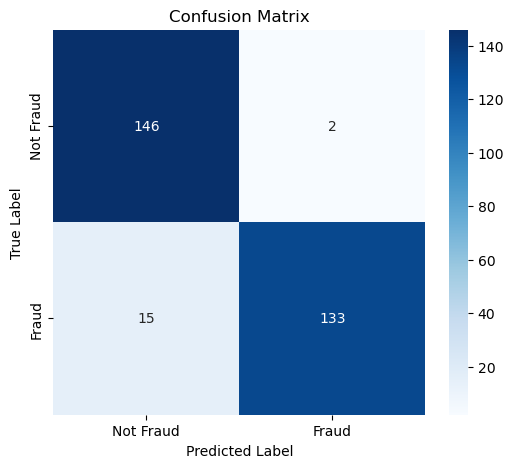

In [84]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [85]:
import joblib

joblib.dump(model, "fraud_detection_model.pkl")  # Save the trained model

['fraud_detection_model.pkl']

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [87]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances.head(10))  # Show top 10 important features

V14    0.147017
V10    0.141329
V11    0.121050
V12    0.099479
V4     0.098603
V17    0.087810
V16    0.038013
V7     0.029426
V3     0.028200
V9     0.018412
dtype: float64


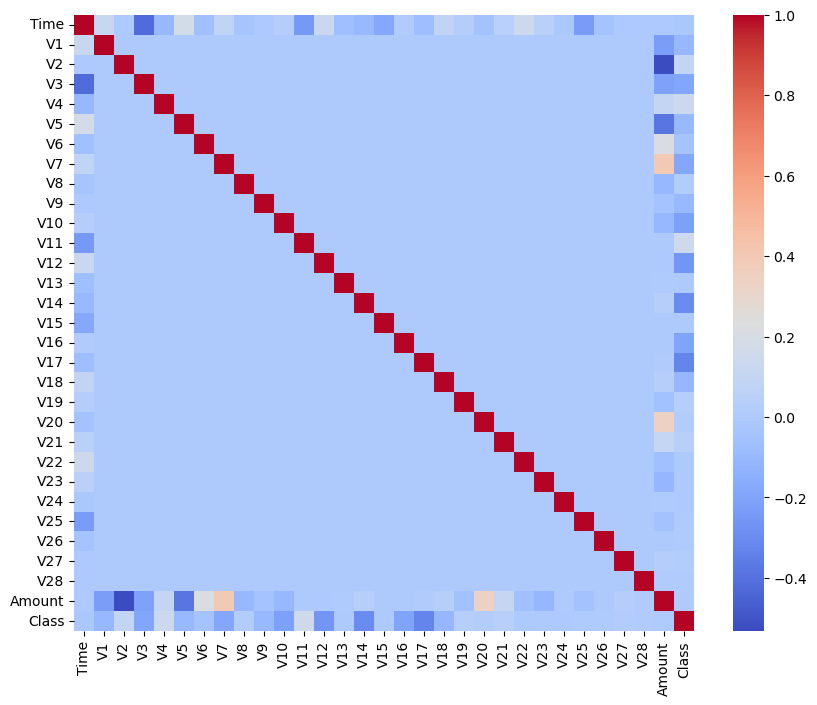

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.show()

In [107]:
# Introduce some missing values randomly (ONLY for training the imputer)
X_missing = X.copy()
X_missing.loc[:, X_missing.columns[6:]] = None

# Train KNN Imputer on the full dataset
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_missing)  # Train on incomplete data

# Save the imputer for use in Streamlit
joblib.dump(imputer, "feature_imputer.pkl")

/var/folders/pt/4n2v8m254xd6tv2l8665t5dc0000gn/T/ipykernel_53571/44126404.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_missing.loc[:, X_missing.columns[6:]] = None
/var/folders/pt/4n2v8m254xd6tv2l8665t5dc0000gn/T/ipykernel_53571/44126404.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_missing.loc[:, X_missing.columns[6:]] = None
/var/folders/pt/4n2v8m254xd6tv2l8665t5dc0000gn/T/ipykernel_53571/44126404.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_missing.loc[:, X_mi

['feature_imputer.pkl']

In [103]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [106]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, Y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(Y_train, y_train_pred, train=True)
print_score(Y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    278.0  272.0       1.0      550.0         550.0
_______________________________________________
Confusion Matrix: 
 [[278   0]
 [  0 272]]

Test Result:
Accuracy Score: 93.92%
_______________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.896341    0.992424  0.939189    0.944383      0.944383
recall       0.993243    0.885135  0.939189    0.939189      0.939189
f1-score     0.942308    0.935714  0.939189    0.939011      0.939011
support    148.000000  148.000000  0.939189  296.000000    296.000000
_______________________________________________